In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,f_classif
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [210]:
df=pd.read_csv('Hotel.csv')

In [211]:
df.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,03/07/2015
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,01/07/2015
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,30/04/2015
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,23/06/2015
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,02/04/2015
5,1,79,2015,July,27,2,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,25/06/2015
6,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,Check-Out,05/07/2015
7,1,63,2015,July,27,2,1,3,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.00,0,0,Canceled,25/06/2015
8,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,02/07/2015
9,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,02/07/2015


In [212]:
df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [213]:
df.shape

(79330, 31)

In [214]:
df['Company'].unique()

array(['       NULL', '40', '45', '38', '9', '47', '49', '51', '48', '62',
       '67', '68', '84', '65', '91', '37', '8', '14', '174', '207', '179',
       '209', '219', '72', '221', '227', '153', '186', '218', '78', '253',
       '202', '216', '275', '277', '233', '280', '309', '321', '331',
       '93', '316', '85', '107', '350', '279', '334', '348', '405', '366',
       '365', '407', '242', '435', '150', '73', '428', '385', '418',
       '197', '409', '450', '452', '169', '466', '43', '115', '465',
       '329', '46', '76', '96', '358', '100', '108', '110', '81', '120',
       '116', '105', '101', '122', '11', '135', '137', '139', '144',
       '142', '127', '130', '143', '148', '140', '149', '163', '160',
       '180', '238', '183', '222', '203', '185', '217', '215', '193',
       '213', '224', '237', '230', '234', '35', '246', '245', '251',
       '255', '158', '258', '259', '260', '263', '411', '254', '272',
       '257', '271', '18', '106', '210', '273', '278', '71', '284', '29

In [215]:
df['Agent'].unique()

array(['6', '9', '1', '8', '13', '11', '7', '15', '       NULL', '27',
       '14', '22', '17', '10', '28', '42', '3', '20', '19', '40', '45',
       '34', '37', '57', '61', '16', '39', '21', '24', '69', '41', '50',
       '30', '54', '52', '12', '44', '26', '64', '31', '29', '83', '32',
       '63', '66', '60', '55', '56', '89', '159', '155', '38', '91', '87',
       '118', '86', '134', '85', '94', '210', '214', '129', '179', '138',
       '174', '154', '170', '182', '153', '93', '151', '119', '35', '168',
       '2', '147', '195', '173', '58', '53', '128', '133', '79', '152',
       '235', '192', '5', '171', '191', '187', '236', '162', '215', '270',
       '157', '281', '177', '287', '240', '132', '331', '234', '98', '77',
       '103', '107', '262', '355', '220', '104', '330', '326', '121',
       '254', '205', '378', '23', '296', '290', '229', '390', '33', '286',
       '47', '276', '425', '315', '484', '323', '403', '219', '394',
       '509', '111', '423', '4', '71', '78', '72', 

In [216]:
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [218]:
df.describe(include='all')

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
count,79330.000000,79330.000000,79330.000000,79330,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330,79306,79330,79330,79330.000000,79330.000000,79330.000000,79330,79330,79330.000000,79330,79330,79330,79330.000000,79330,79330.000000,79330.000000,79330.000000,79330,79330
unique,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,166,8,5,NaN,NaN,NaN,8,9,NaN,3,224,208,NaN,4,NaN,NaN,NaN,3,864
top,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,9,NULL,NaN,Transient,NaN,NaN,NaN,Check-Out,21/10/2015
freq,NaN,NaN,NaN,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62305,30960,38748,68945,NaN,NaN,NaN,62595,57007,NaN,66442,31955,75641,NaN,59404,NaN,NaN,NaN,46228,1416
mean,0.417270,109.735724,2016.174285,NaN,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,NaN,NaN,NaN,NaN,0.025615,0.079743,0.132371,NaN,NaN,0.187369,NaN,NaN,NaN,3.226774,NaN,105.304465,0.024367,0.546918,NaN,NaN
std,0.493111,110.948526,0.699181,NaN,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,NaN,NaN,NaN,NaN,0.157983,0.415472,1.693411,NaN,NaN,0.608620,NaN,NaN,NaN,20.870890,NaN,43.602954,0.154919,0.780776,NaN,NaN
min,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,23.000000,2016.000000,NaN,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,79.200000,0.000000,0.000000,NaN,NaN
50%,0.000000,74.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,99.900000,0.000000,0.000000,NaN,NaN
75%,1.000000,163.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [219]:
train,test=train_test_split(df, test_size=0.2, random_state=123)

In [220]:
train.shape

(63464, 31)

## Action 1 = resetting the index of the splitted columns 

In [221]:
train.reset_index(drop=True,inplace=True)

In [222]:
train.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,55,2017,April,16,17,1,1,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,108.0,0,1,Check-Out,19/04/2017
1,0,0,2016,January,3,11,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,7,A,A,0,No Deposit,NULL,40,0,Transient,65.0,0,0,Check-Out,14/01/2016
2,0,51,2017,March,11,18,2,1,3,0.0,0,BB,CHE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,22,NULL,0,Transient,99.0,0,0,Check-Out,21/03/2017
3,1,316,2017,May,19,10,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,123.3,0,1,Canceled,09/01/2017
4,0,77,2017,March,11,17,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,97.2,0,0,Check-Out,20/03/2017
5,0,423,2017,July,29,22,1,1,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient-Party,122.4,0,1,Check-Out,24/07/2017
6,0,62,2016,September,40,27,0,3,2,0.0,0,BB,BEL,Direct,Direct,0,0,0,A,A,0,No Deposit,14,NULL,0,Transient,125.1,0,0,Check-Out,30/09/2016
7,1,109,2016,February,9,21,2,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,19,NULL,44,Transient,75.0,0,0,Canceled,18/12/2015
8,1,211,2017,May,21,24,0,4,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,107.1,0,0,Canceled,25/10/2016
9,0,159,2016,September,40,29,1,3,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,113.4,0,2,Check-Out,03/10/2016


In [223]:
train.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        22
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

## Action 2

In [224]:
train[['Agent','Company']]=train[['Agent','Company']].replace('       NULL',np.nan)

In [225]:
train.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,55,2017,April,16,17,1,1,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,108.0,0,1,Check-Out,19/04/2017
1,0,0,2016,January,3,11,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,7,A,A,0,No Deposit,NaN,40,0,Transient,65.0,0,0,Check-Out,14/01/2016
2,0,51,2017,March,11,18,2,1,3,0.0,0,BB,CHE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,22,NaN,0,Transient,99.0,0,0,Check-Out,21/03/2017
3,1,316,2017,May,19,10,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NaN,0,Transient,123.3,0,1,Canceled,09/01/2017
4,0,77,2017,March,11,17,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,97.2,0,0,Check-Out,20/03/2017
5,0,423,2017,July,29,22,1,1,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NaN,0,Transient-Party,122.4,0,1,Check-Out,24/07/2017
6,0,62,2016,September,40,27,0,3,2,0.0,0,BB,BEL,Direct,Direct,0,0,0,A,A,0,No Deposit,14,NaN,0,Transient,125.1,0,0,Check-Out,30/09/2016
7,1,109,2016,February,9,21,2,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,19,NaN,44,Transient,75.0,0,0,Canceled,18/12/2015
8,1,211,2017,May,21,24,0,4,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,107.1,0,0,Canceled,25/10/2016
9,0,159,2016,September,40,29,1,3,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NaN,0,Transient,113.4,0,2,Check-Out,03/10/2016


## Action 3

In [226]:

train=train.drop(['Company','Agent'],axis=1)

In [227]:
train.duplicated().sum()

19694

In [228]:
train.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,55,2017,April,16,17,1,1,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.0,0,1,Check-Out,19/04/2017
1,0,0,2016,January,3,11,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,7,A,A,0,No Deposit,0,Transient,65.0,0,0,Check-Out,14/01/2016
2,0,51,2017,March,11,18,2,1,3,0.0,0,BB,CHE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,99.0,0,0,Check-Out,21/03/2017
3,1,316,2017,May,19,10,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,123.3,0,1,Canceled,09/01/2017
4,0,77,2017,March,11,17,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,97.2,0,0,Check-Out,20/03/2017
5,0,423,2017,July,29,22,1,1,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,122.4,0,1,Check-Out,24/07/2017
6,0,62,2016,September,40,27,0,3,2,0.0,0,BB,BEL,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,125.1,0,0,Check-Out,30/09/2016
7,1,109,2016,February,9,21,2,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,44,Transient,75.0,0,0,Canceled,18/12/2015
8,1,211,2017,May,21,24,0,4,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,107.1,0,0,Canceled,25/10/2016
9,0,159,2016,September,40,29,1,3,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,113.4,0,2,Check-Out,03/10/2016


## Action 4

In [229]:
def index_restor(train):
    train.reset_index(drop=True, inplace=True)
    train.duplicated().sum()
    train.drop_duplicates(keep='first',inplace=True,ignore_index=True)
    return train
train=index_restor(train)

In [230]:
train.duplicated().sum()

0

In [231]:
train.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,55,2017,April,16,17,1,1,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.0,0,1,Check-Out,19/04/2017
1,0,0,2016,January,3,11,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,7,A,A,0,No Deposit,0,Transient,65.0,0,0,Check-Out,14/01/2016
2,0,51,2017,March,11,18,2,1,3,0.0,0,BB,CHE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,99.0,0,0,Check-Out,21/03/2017
3,1,316,2017,May,19,10,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,123.3,0,1,Canceled,09/01/2017
4,0,77,2017,March,11,17,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,97.2,0,0,Check-Out,20/03/2017
5,0,423,2017,July,29,22,1,1,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,122.4,0,1,Check-Out,24/07/2017
6,0,62,2016,September,40,27,0,3,2,0.0,0,BB,BEL,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,125.1,0,0,Check-Out,30/09/2016
7,1,109,2016,February,9,21,2,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,44,Transient,75.0,0,0,Canceled,18/12/2015
8,1,211,2017,May,21,24,0,4,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,107.1,0,0,Canceled,25/10/2016
9,0,159,2016,September,40,29,1,3,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,113.4,0,2,Check-Out,03/10/2016


In [232]:
train.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
Country                        6
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int64

## Action 5

In [233]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [234]:
train.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,55,2017,April,16,17,1,1,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.0,0,1,Check-Out,19/04/2017
1,0,0,2016,January,3,11,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,7,A,A,0,No Deposit,0,Transient,65.0,0,0,Check-Out,14/01/2016
2,0,51,2017,March,11,18,2,1,3,0.0,0,BB,CHE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,99.0,0,0,Check-Out,21/03/2017
3,1,316,2017,May,19,10,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,123.3,0,1,Canceled,09/01/2017
4,0,77,2017,March,11,17,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,97.2,0,0,Check-Out,20/03/2017
5,0,423,2017,July,29,22,1,1,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,122.4,0,1,Check-Out,24/07/2017
6,0,62,2016,September,40,27,0,3,2,0.0,0,BB,BEL,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,125.1,0,0,Check-Out,30/09/2016
7,1,109,2016,February,9,21,2,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,44,Transient,75.0,0,0,Canceled,18/12/2015
8,1,211,2017,May,21,24,0,4,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,107.1,0,0,Canceled,25/10/2016
9,0,159,2016,September,40,29,1,3,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,113.4,0,2,Check-Out,03/10/2016


## Action 6

In [235]:
train['Children']=train['Children'].astype(int)
train['ReservationStatusDate']=pd.to_datetime(train['ReservationStatusDate'])

C:\Users\emmanul\AppData\Local\Temp\ipykernel_6708\769868840.py:2: UserWarning: Parsing '19/04/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  train['ReservationStatusDate']=pd.to_datetime(train['ReservationStatusDate'])
C:\Users\emmanul\AppData\Local\Temp\ipykernel_6708\769868840.py:2: UserWarning: Parsing '14/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  train['ReservationStatusDate']=pd.to_datetime(train['ReservationStatusDate'])
C:\Users\emmanul\AppData\Local\Temp\ipykernel_6708\769868840.py:2: UserWarning: Parsing '21/03/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  train['ReservationStatusDate']=pd.to_datetime(train['ReservationStatusDate'])
C:\Users\emmanul\AppData\Local\Temp\ipykernel_6708\769868840.py:2: UserWarning: Parsing '20/03/2017' in DD/MM/YYYY format. Provide format or specify infer_datet

In [236]:
train.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int64

In [237]:
train.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,55,2017,April,16,17,1,1,2,0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.0,0,1,Check-Out,2017-04-19
1,0,0,2016,January,3,11,1,2,1,0,0,BB,PRT,Corporate,Corporate,1,0,7,A,A,0,No Deposit,0,Transient,65.0,0,0,Check-Out,2016-01-14
2,0,51,2017,March,11,18,2,1,3,0,0,BB,CHE,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,99.0,0,0,Check-Out,2017-03-21
3,1,316,2017,May,19,10,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,123.3,0,1,Canceled,2017-09-01
4,0,77,2017,March,11,17,1,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,97.2,0,0,Check-Out,2017-03-20
5,0,423,2017,July,29,22,1,1,2,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,122.4,0,1,Check-Out,2017-07-24
6,0,62,2016,September,40,27,0,3,2,0,0,BB,BEL,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,125.1,0,0,Check-Out,2016-09-30
7,1,109,2016,February,9,21,2,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,44,Transient,75.0,0,0,Canceled,2015-12-18
8,1,211,2017,May,21,24,0,4,2,0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,107.1,0,0,Canceled,2016-10-25
9,0,159,2016,September,40,29,1,3,2,0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,113.4,0,2,Check-Out,2016-03-10


## Action 7 Feature engineering

In [238]:
train['FamilySize'] = train['Adults'] + train['Children'] + train['Babies']
train['TotalStayNights'] = train['StaysInWeekendNights'] + train['StaysInWeekNights']

In [239]:
train.shape

(43760, 31)


## Action 8 Outliers

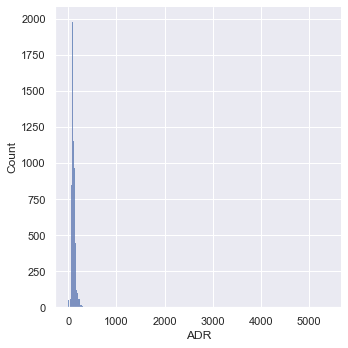

In [240]:
sns.displot(train['ADR'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ADR'>

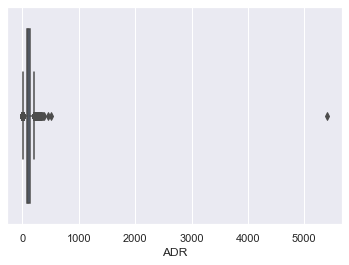

In [241]:
sns.boxplot(train['ADR'])

In [242]:
def cap_outlier(data,var):
    q1,q3=np.percentile(data[var],[25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    
    data[var].values[data[var].values>upper]=upper
    data[var].values[data[var].values<lower]=lower
    data.reset_index(drop=True,inplace=True)
    return data

In [243]:

train = cap_outlier(train,'ADR')

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ADR'>

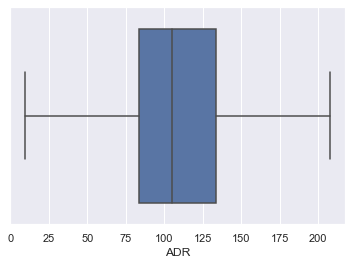

In [244]:
sns.boxplot(train['ADR'])

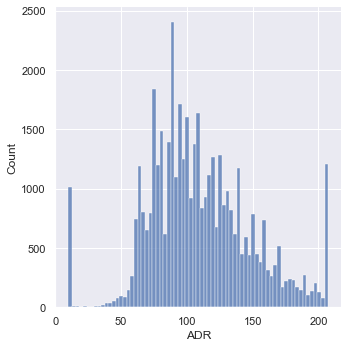

In [245]:
sns.displot(train['ADR'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ADR', ylabel='Density'>

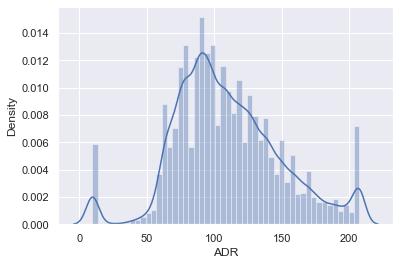

In [246]:
sns.distplot(train['ADR'])

In [247]:
train.dtypes

IsCanceled                              int64
LeadTime                                int64
ArrivalDateYear                         int64
ArrivalDateMonth                       object
ArrivalDateWeekNumber                   int64
ArrivalDateDayOfMonth                   int64
StaysInWeekendNights                    int64
StaysInWeekNights                       int64
Adults                                  int64
Children                                int32
Babies                                  int64
Meal                                   object
Country                                object
MarketSegment                          object
DistributionChannel                    object
IsRepeatedGuest                         int64
PreviousCancellations                   int64
PreviousBookingsNotCanceled             int64
ReservedRoomType                       object
AssignedRoomType                       object
BookingChanges                          int64
DepositType                       

In [248]:
cat = []
for i in train.columns:
    if train[i].dtype == 'O':
        cat.append(i)

In [249]:
cat

['ArrivalDateMonth',
 'Meal',
 'Country',
 'MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'CustomerType',
 'ReservationStatus']

In [250]:
train.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
FamilySize                     0
TotalStayN

In [251]:
train.duplicated().sum()

3

In [252]:
train=index_restor(train)

In [253]:
train.duplicated().sum()

0

In [254]:
for i in cat:
    if train[i].dtype == 'O':
        print(f"{i} has {train[i].nunique()} categories\nThey are:\n{train[i].unique()}\n") 
        

ArrivalDateMonth has 12 categories
They are:
['April' 'January' 'March' 'May' 'July' 'September' 'February' 'November'
 'August' 'June' 'October' 'December']

Meal has 4 categories
They are:
['SC       ' 'BB       ' 'HB       ' 'FB       ']

Country has 161 categories
They are:
['NOR' 'PRT' 'CHE' 'DEU' 'BEL' 'GBR' 'IRL' 'SWE' 'USA' 'CZE' 'GHA' 'POL'
 'FRA' 'MOZ' 'AGO' 'ITA' 'DNK' 'AUT' 'ESP' 'TUR' 'CN' 'BRA' 'ROU' 'HRV'
 'MAR' 'NLD' 'AUS' 'CHN' 'QAT' 'PER' 'ISR' 'THA' 'FIN' 'LUX' 'HUN' 'TWN'
 'LTU' 'SVN' 'JPN' 'CPV' 'IND' 'ARE' 'MEX' 'DZA' 'TUN' 'COL' 'RUS' 'LVA'
 'KOR' 'SGP' 'BGR' 'SRB' 'IDN' 'KWT' 'ZAF' 'ARG' 'SVK' 'ISL' 'IRN' 'ALB'
 'LBY' 'ECU' 'NZL' 'AND' 'CHL' 'EST' 'CYP' 'CRI' 'MAC' 'UKR' 'VEN' 'MYS'
 'LBN' 'BOL' 'MLI' 'HKG' 'GRC' 'KAZ' 'PHL' 'EGY' 'URY' 'IRQ' 'AZE' 'GEO'
 'MCO' 'BLR' 'GNB' 'SAU' 'DOM' 'JOR' 'JEY' 'MKD' 'CUB' 'VNM' 'RWA' 'AIA'
 'NGA' 'LKA' 'NIC' 'MDV' 'BGD' 'BIH' 'TZA' 'BRB' 'FRO' 'CMR' 'MUS' 'IMN'
 'SLV' 'GAB' 'TJK' 'LAO' 'MLT' 'GUY' 'PAK' 'STP' 'OMN' 'UZB' 'KHM

In [255]:
col = train.columns
col

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'DaysInWaitingList', 'CustomerType',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatus', 'ReservationStatusDate', 'FamilySize',
       'TotalStayNights'],
      dtype='object')

In [256]:
X_train=train.drop(["IsCanceled","ReservationStatusDate"],axis=1)
y_train=train['IsCanceled']

In [257]:
cat1 = []
for i in X_train.columns:
    if X_train[i].dtype == 'O':
        cat1.append(i)

In [258]:
cat1

['ArrivalDateMonth',
 'Meal',
 'Country',
 'MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'CustomerType',
 'ReservationStatus']

In [259]:
encoder= OrdinalEncoder()

X_train[cat1]=encoder.fit_transform(X_train[cat1])

#encoder = OneHotEncoder(drop='first',dtype=int)

#enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())
#enc_data.columns = encoder.get_feature_names_out()

#X_train = X_train.join(enc_data)

#X_train.drop(cat1, axis=1,inplace=True)

In [260]:
col1 = X_train.columns

In [261]:
#A9
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=col1)

In [262]:
X_train.head(10)

,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,FamilySize,TotalStayNights
0,0.087440,1.0,0.000000,0.288462,0.533333,0.0625,0.024390,0.50,0.0,0.0,1.000000,0.69375,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.496890,0.0,0.2,0.5,0.166667,0.035088
1,0.000000,0.5,0.363636,0.038462,0.333333,0.0625,0.048780,0.25,0.0,0.0,0.000000,0.75000,0.333333,0.000000,1.0,0.000000,0.1,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.279410,0.0,0.0,0.5,0.083333,0.052632
2,0.081081,1.0,0.636364,0.192308,0.566667,0.1250,0.024390,0.75,0.0,0.0,0.000000,0.15625,0.833333,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.451371,0.0,0.0,0.5,0.250000,0.052632
3,0.502385,1.0,0.727273,0.346154,0.300000,0.0000,0.048780,0.50,0.0,0.0,0.000000,0.75000,1.000000,1.000000,0.0,0.000000,0.0,0.428571,0.375,0.0,0.0,0.000000,0.666667,0.574272,0.0,0.2,0.0,0.166667,0.035088
4,0.122417,1.0,0.636364,0.192308,0.533333,0.0625,0.048780,0.50,0.0,0.0,0.000000,0.75000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.442267,0.0,0.0,0.5,0.166667,0.052632
5,0.672496,1.0,0.454545,0.538462,0.700000,0.0625,0.024390,0.50,0.0,0.0,0.666667,0.23125,0.833333,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,1.000000,0.569720,0.0,0.2,0.5,0.166667,0.035088
6,0.098569,0.5,1.000000,0.750000,0.866667,0.0000,0.073171,0.50,0.0,0.0,0.000000,0.08125,0.500000,0.333333,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.583375,0.0,0.0,0.5,0.166667,0.052632
7,0.173291,0.5,0.272727,0.153846,0.666667,0.1250,0.024390,0.50,0.0,0.0,0.000000,0.75000,0.833333,1.000000,0.0,0.047619,0.0,0.000000,0.000,0.0,0.5,0.112532,0.666667,0.329987,0.0,0.0,0.0,0.166667,0.052632
8,0.335453,1.0,0.727273,0.384615,0.766667,0.0000,0.097561,0.50,0.0,0.0,1.000000,0.69375,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.492338,0.0,0.0,0.0,0.166667,0.070175
9,0.252782,0.5,1.000000,0.750000,0.933333,0.0625,0.073171,0.50,0.0,0.0,1.000000,0.31875,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.524201,0.0,0.4,0.5,0.166667,0.070175


In [263]:
# Instantiate SMOTE
smote = SMOTE()
# Apply SMOTE to your dataset
X_resampled, y_resampled =smote.fit_resample(X_train, y_train)

In [264]:
X_resampled.head(10)

,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,FamilySize,TotalStayNights
0,0.087440,1.0,0.000000,0.288462,0.533333,0.0625,0.024390,0.50,0.0,0.0,1.000000,0.69375,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.496890,0.0,0.2,0.5,0.166667,0.035088
1,0.000000,0.5,0.363636,0.038462,0.333333,0.0625,0.048780,0.25,0.0,0.0,0.000000,0.75000,0.333333,0.000000,1.0,0.000000,0.1,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.279410,0.0,0.0,0.5,0.083333,0.052632
2,0.081081,1.0,0.636364,0.192308,0.566667,0.1250,0.024390,0.75,0.0,0.0,0.000000,0.15625,0.833333,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.451371,0.0,0.0,0.5,0.250000,0.052632
3,0.502385,1.0,0.727273,0.346154,0.300000,0.0000,0.048780,0.50,0.0,0.0,0.000000,0.75000,1.000000,1.000000,0.0,0.000000,0.0,0.428571,0.375,0.0,0.0,0.000000,0.666667,0.574272,0.0,0.2,0.0,0.166667,0.035088
4,0.122417,1.0,0.636364,0.192308,0.533333,0.0625,0.048780,0.50,0.0,0.0,0.000000,0.75000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.442267,0.0,0.0,0.5,0.166667,0.052632
5,0.672496,1.0,0.454545,0.538462,0.700000,0.0625,0.024390,0.50,0.0,0.0,0.666667,0.23125,0.833333,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,1.000000,0.569720,0.0,0.2,0.5,0.166667,0.035088
6,0.098569,0.5,1.000000,0.750000,0.866667,0.0000,0.073171,0.50,0.0,0.0,0.000000,0.08125,0.500000,0.333333,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.583375,0.0,0.0,0.5,0.166667,0.052632
7,0.173291,0.5,0.272727,0.153846,0.666667,0.1250,0.024390,0.50,0.0,0.0,0.000000,0.75000,0.833333,1.000000,0.0,0.047619,0.0,0.000000,0.000,0.0,0.5,0.112532,0.666667,0.329987,0.0,0.0,0.0,0.166667,0.052632
8,0.335453,1.0,0.727273,0.384615,0.766667,0.0000,0.097561,0.50,0.0,0.0,1.000000,0.69375,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.492338,0.0,0.0,0.0,0.166667,0.070175
9,0.252782,0.5,1.000000,0.750000,0.933333,0.0625,0.073171,0.50,0.0,0.0,1.000000,0.31875,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.0,0.000000,0.666667,0.524201,0.0,0.4,0.5,0.166667,0.070175


<AxesSubplot:>

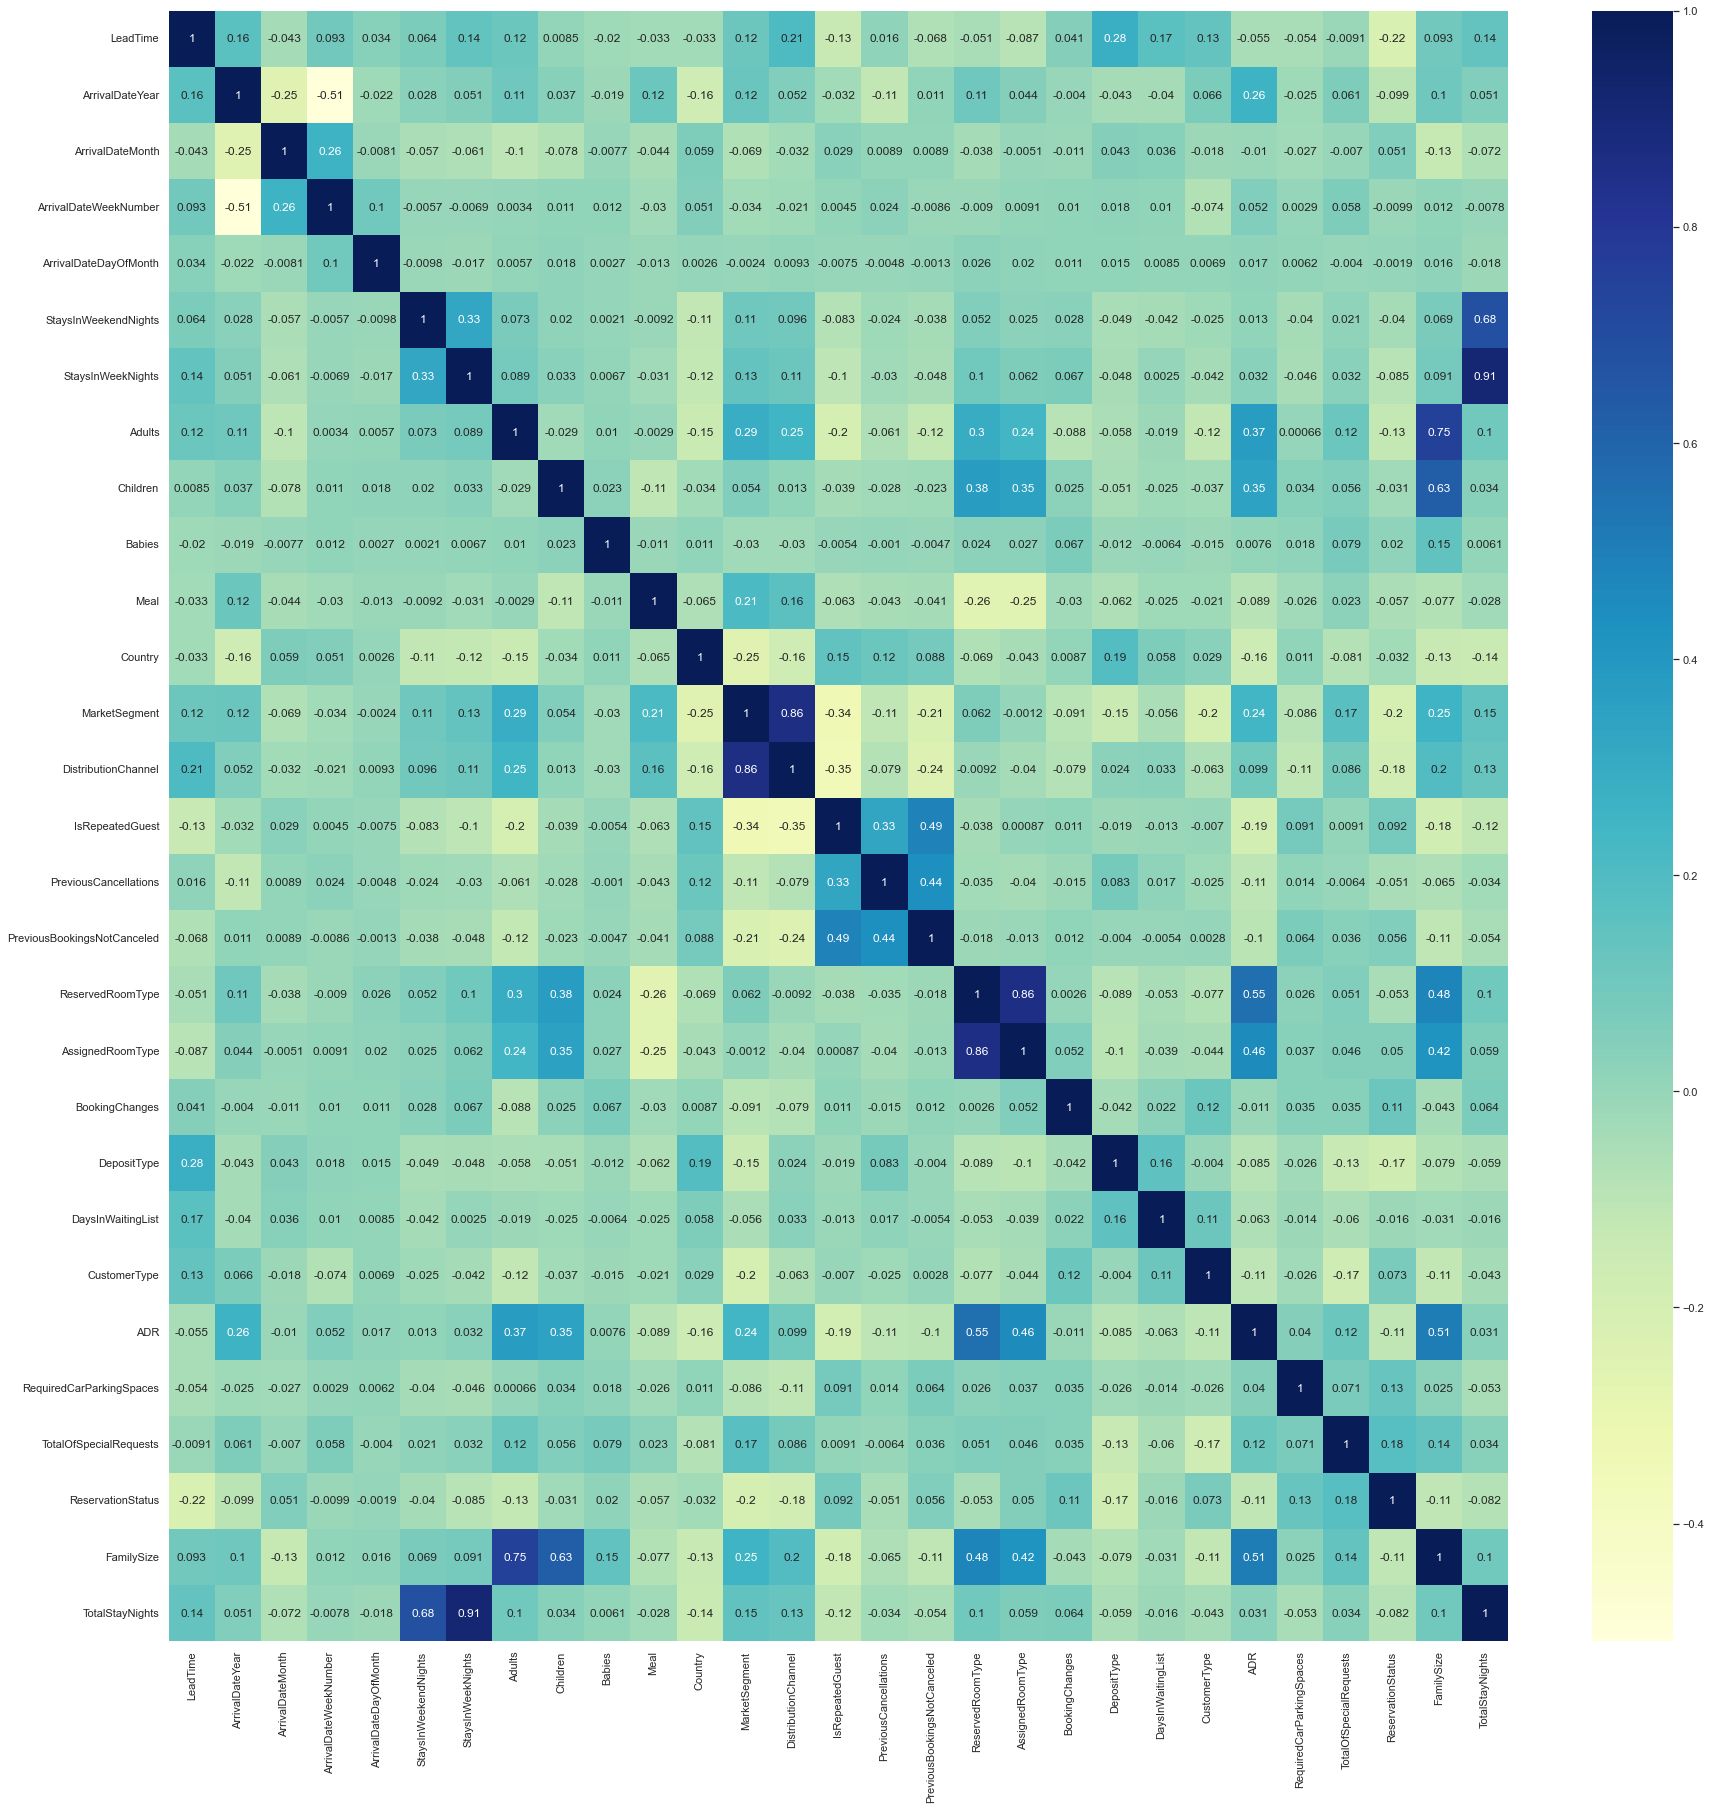

In [265]:
 plt.figure(figsize=(30,30))
cors = X_resampled.corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

In [266]:
df["IsCanceled"].value_counts()

0    46228
1    33102
Name: IsCanceled, dtype: int64

<AxesSubplot:>

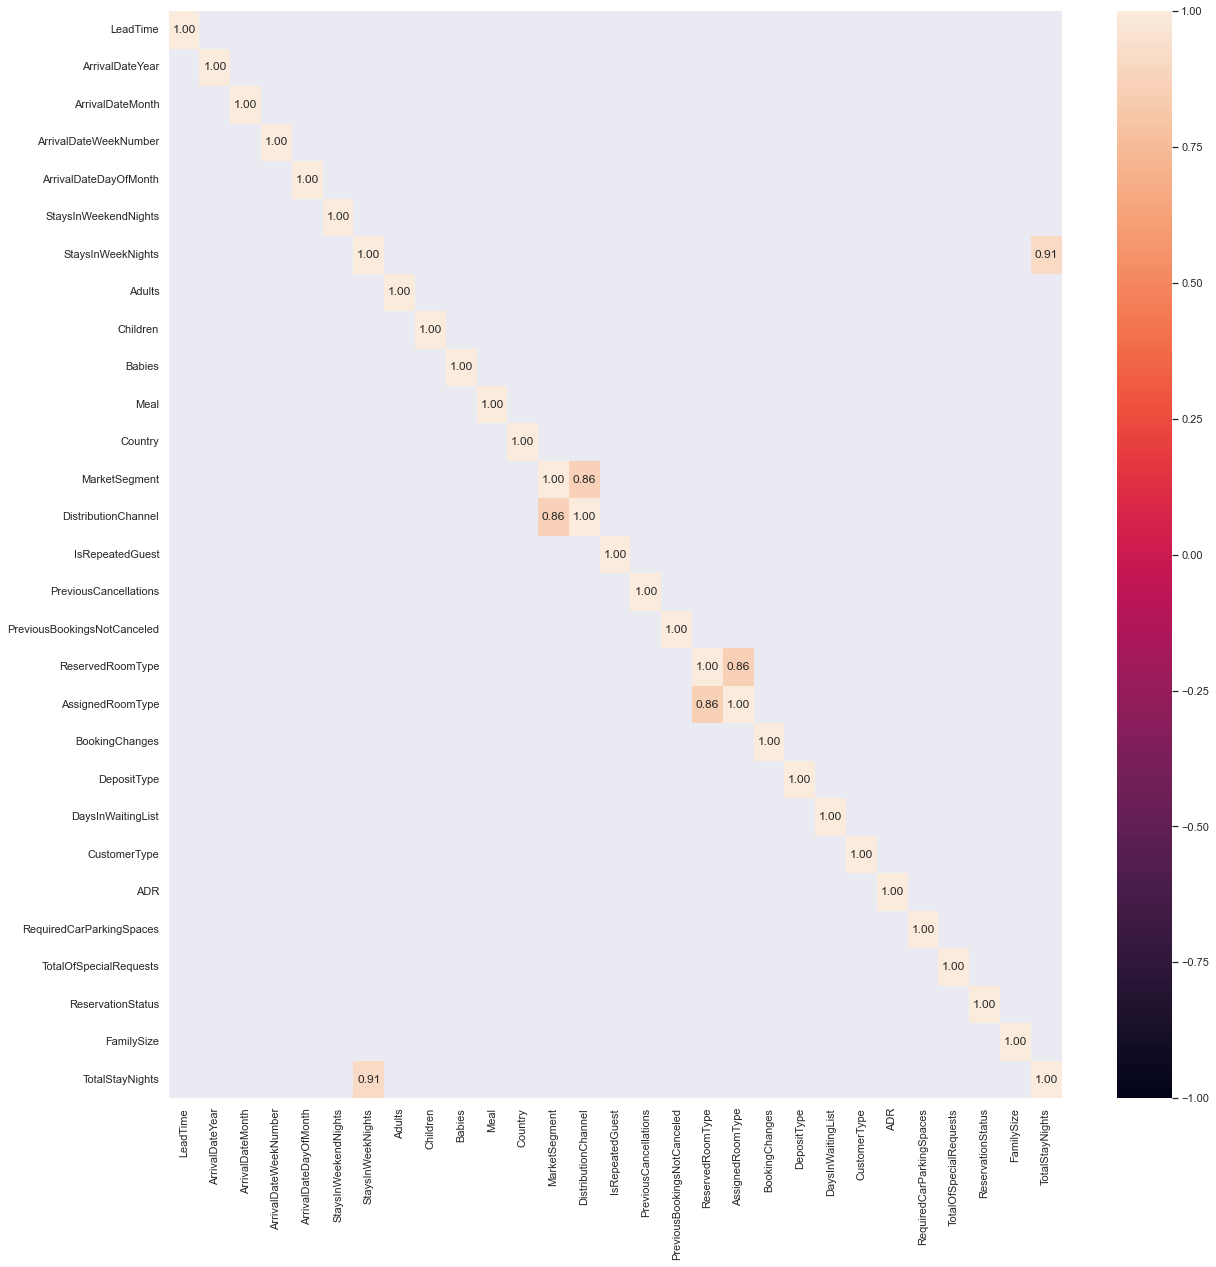

In [267]:
mask = cors[(cors >= 0.85)|(cors <= -0.85)]

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

In [268]:
C = train.corr()['IsCanceled'].sort_values(ascending=False).drop('IsCanceled')
C 

LeadTime                       0.193809
TotalStayNights                0.112154
StaysInWeekNights              0.109872
ADR                            0.092411
Adults                         0.084122
FamilySize                     0.083096
ArrivalDateYear                0.081432
StaysInWeekendNights           0.061451
PreviousCancellations          0.045256
Children                       0.032246
DaysInWaitingList              0.010290
ArrivalDateDayOfMonth          0.003579
ArrivalDateWeekNumber         -0.009616
Babies                        -0.017707
PreviousBookingsNotCanceled   -0.048193
IsRepeatedGuest               -0.073535
BookingChanges                -0.092718
RequiredCarParkingSpaces      -0.123235
TotalOfSpecialRequests        -0.166533
Name: IsCanceled, dtype: float64

In [269]:
decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(X_resampled, y_resampled)
predictors = col1 

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()
coef.head(40)

ReservationStatus              1.0
LeadTime                       0.0
PreviousCancellations          0.0
FamilySize                     0.0
TotalOfSpecialRequests         0.0
RequiredCarParkingSpaces       0.0
ADR                            0.0
CustomerType                   0.0
DaysInWaitingList              0.0
DepositType                    0.0
BookingChanges                 0.0
AssignedRoomType               0.0
ReservedRoomType               0.0
PreviousBookingsNotCanceled    0.0
IsRepeatedGuest                0.0
ArrivalDateYear                0.0
DistributionChannel            0.0
MarketSegment                  0.0
Country                        0.0
Meal                           0.0
Babies                         0.0
Children                       0.0
Adults                         0.0
StaysInWeekNights              0.0
StaysInWeekendNights           0.0
ArrivalDateDayOfMonth          0.0
ArrivalDateWeekNumber          0.0
ArrivalDateMonth               0.0
TotalStayNights     

In [270]:
k=15
selector=SelectKBest(f_classif,k=15)
X_res_new=selector.fit_transform(X_resampled, y_resampled)
scores= pd.DataFrame({'Features':X_resampled.columns,'Score':selector.scores_})
top_feat=scores.sort_values('Score',ascending=False)
top_feat.head(15)


,Features,Score
26,ReservationStatus,141707.280520
25,TotalOfSpecialRequests,2576.375970
0,LeadTime,2500.708797
12,MarketSegment,2203.602685
13,DistributionChannel,1815.625665
20,DepositType,1793.000676
24,RequiredCarParkingSpaces,1557.789707
19,BookingChanges,895.322223
28,TotalStayNights,782.348694
6,StaysInWeekNights,781.443359


In [271]:
X_resampled.shape

(61064, 29)

In [272]:
X_resampled.columns

Index(['LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'DaysInWaitingList', 'CustomerType',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatus', 'FamilySize', 'TotalStayNights'],
      dtype='object')

In [273]:
X_resampled.drop(['StaysInWeekendNights', 'ArrivalDateMonth','ArrivalDateWeekNumber','ReservedRoomType','StaysInWeekNights', 'MarketSegment',
                             'Babies','Country','PreviousCancellations','PreviousBookingsNotCanceled','ArrivalDateDayOfMonth','Children','Meal','CustomerType',],axis=1,inplace=True)

In [274]:
X_resampled.columns

Index(['LeadTime', 'ArrivalDateYear', 'Adults', 'DistributionChannel',
       'IsRepeatedGuest', 'AssignedRoomType', 'BookingChanges', 'DepositType',
       'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'FamilySize',
       'TotalStayNights'],
      dtype='object')

In [275]:
def prepare(df):
    df.reset_index(drop=True,inplace=True)
    df[['Agent','Company']]=df[['Agent','Company']].replace('       NULL',np.nan)
    df=df.drop(['Company','Agent'],axis=1)
    df.reset_index(drop=True, inplace=True)
    df=index_restor(df)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['Children']=df['Children'].astype(int)
    df['ReservationStatusDate']=pd.to_datetime(df['ReservationStatusDate'])
    df['FamilySize'] = df['Adults'] + df['Children'] + df['Babies']
    df['TotalStayNights'] = df['StaysInWeekendNights'] + df['StaysInWeekNights']
    df = cap_outlier(df,'ADR')
    df=index_restor(df)
    X_test=df.drop(["IsCanceled","ReservationStatusDate"],axis=1)
    y_test=df['IsCanceled']
    cat1=['ArrivalDateMonth','Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','DepositType','CustomerType','ReservationStatus']
    encoder= OrdinalEncoder()
    X_test[cat1]=encoder.fit_transform(X_test[cat1])
    col2 = X_test.columns
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test, columns=col2)
    X_test.drop(['StaysInWeekendNights', 'ArrivalDateMonth','ArrivalDateWeekNumber','ReservedRoomType','StaysInWeekNights', 'MarketSegment','Babies','Country',
                 'PreviousCancellations','PreviousBookingsNotCanceled','ArrivalDateDayOfMonth','Children','Meal','CustomerType',],axis=1,inplace=True)
    return X_test,y_test
    
    

In [276]:
X_test,y_test = prepare(test)

C:\Users\emmanul\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/06/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\emmanul\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/09/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\emmanul\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\emmanul\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/03/2016' in DD/MM/YYYY format. Provide format o

In [277]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

In [280]:
#Write a function evaluate the performance of the model, 
# print the AUC curve as well as the confusion matrix table
def performance(model,X_resampled, y_resampled, X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d'

 )

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, X_test, y_test)
    plt.show()


 Accuracy Score : 
  0.9854991187309726

 AUC Score : 
 0.9567338796074981

 Confusion Matrix : 
  [[8323    1]
 [ 180 3978]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8324
           1       1.00      0.96      0.98      4158

    accuracy                           0.99     12482
   macro avg       0.99      0.98      0.98     12482
weighted avg       0.99      0.99      0.99     12482


 ROC curve : 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


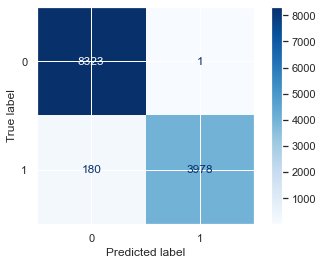

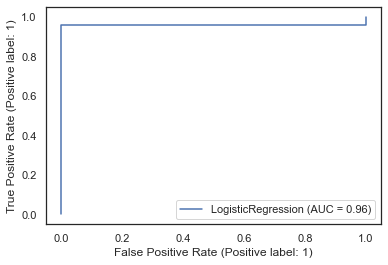

In [284]:
model1 = model_to_use("LR")
model1.fit(X_resampled, y_resampled)
performance(model1,X_resampled, y_resampled,X_test, y_test)


 Accuracy Score : 
  1.0

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[8324    0]
 [   0 4158]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8324
           1       1.00      1.00      1.00      4158

    accuracy                           1.00     12482
   macro avg       1.00      1.00      1.00     12482
weighted avg       1.00      1.00      1.00     12482


 ROC curve : 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


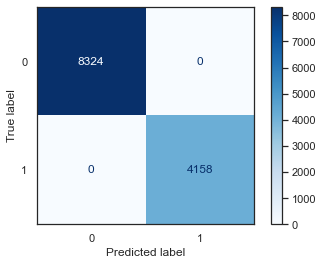

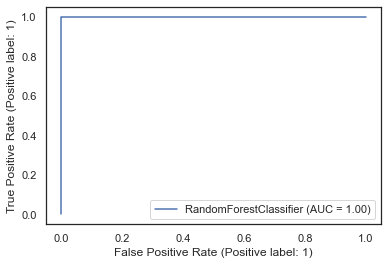

In [286]:
model2 = model_to_use("RF")
model2.fit(X_resampled, y_resampled)
performance(model2,X_resampled, y_resampled,X_test, y_test)


 Accuracy Score : 
  0.9997596539016184

 AUC Score : 
 0.9999998988766409

 Confusion Matrix : 
  [[8323    1]
 [   2 4156]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8324
           1       1.00      1.00      1.00      4158

    accuracy                           1.00     12482
   macro avg       1.00      1.00      1.00     12482
weighted avg       1.00      1.00      1.00     12482


 ROC curve : 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


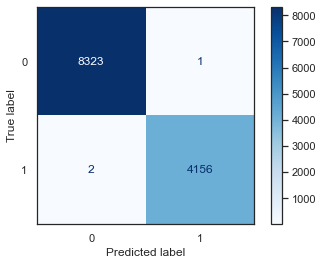

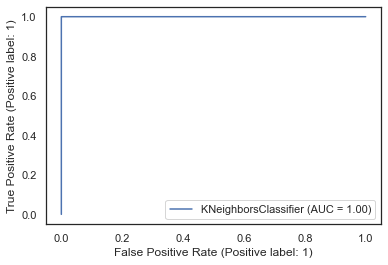

In [287]:
model3 = model_to_use("KNN")
model3.fit(X_resampled, y_resampled)
performance(model3,X_resampled, y_resampled,X_test, y_test)


 Accuracy Score : 
  1.0

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[8324    0]
 [   0 4158]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8324
           1       1.00      1.00      1.00      4158

    accuracy                           1.00     12482
   macro avg       1.00      1.00      1.00     12482
weighted avg       1.00      1.00      1.00     12482


 ROC curve : 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


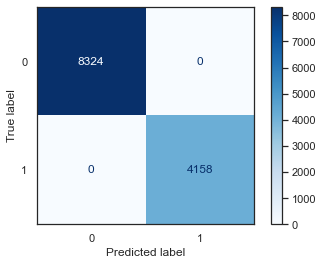

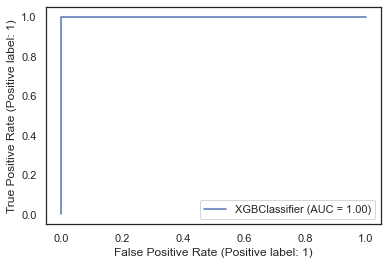

In [288]:
model4 = model_to_use("XGBC")
model4.fit(X_resampled, y_resampled)
performance(model4,X_resampled, y_resampled,X_test, y_test)


 Accuracy Score : 
  0.9999198846338728

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[8323    1]
 [   0 4158]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8324
           1       1.00      1.00      1.00      4158

    accuracy                           1.00     12482
   macro avg       1.00      1.00      1.00     12482
weighted avg       1.00      1.00      1.00     12482


 ROC curve : 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


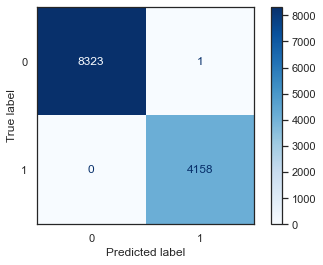

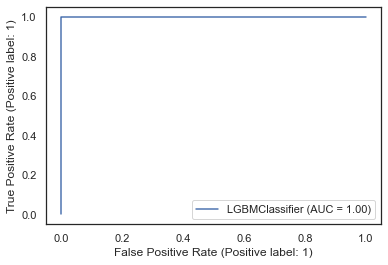

In [289]:
model5 = model_to_use("LGBMC")
model5.fit(X_resampled, y_resampled)
performance(model5,X_resampled, y_resampled,X_test, y_test)


 Accuracy Score : 
  1.0

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[8324    0]
 [   0 4158]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8324
           1       1.00      1.00      1.00      4158

    accuracy                           1.00     12482
   macro avg       1.00      1.00      1.00     12482
weighted avg       1.00      1.00      1.00     12482


 ROC curve : 



C:\Users\emmanul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


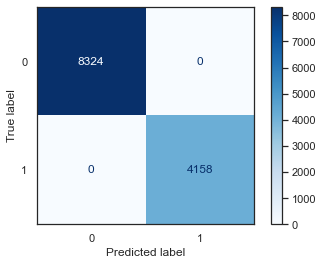

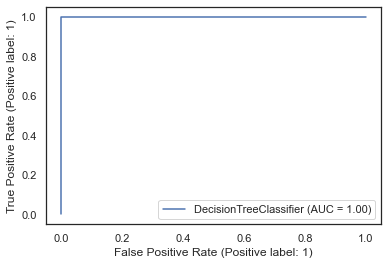

In [290]:
model6 = model_to_use("DT")
model6.fit(X_resampled, y_resampled)
performance(model6,X_resampled, y_resampled,X_test, y_test)

In [291]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [292]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_resampled, y_resampled)

In [293]:
y_ros.value_counts()

0    30532
1    30532
Name: IsCanceled, dtype: int64

In [294]:
y_resampled.value_counts()

0    30532
1    30532
Name: IsCanceled, dtype: int64

In [331]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your training and testing data and labels in X_train, X_test, y_train, y_test respectively

# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an instance of your model

# Perform cross-validation on the training data
train_scores = cross_val_score(model3,X_resampled, y_resampled, cv=kfold)

# Fit the model on the training data
model3.fit(X_resampled, y_resampled)

# Evaluate the model on the test data
test_score = model3.score(X_test, y_test)

# Print the cross-validation scores and test score
print("Cross-validation scores:", train_scores)
print("Average score:", train_scores.mean())
print("Test score:", test_score)


Cross-validation scores: [0.99950872 0.99975436 0.99975436 0.99991812 0.99934491]
Average score: 0.9996560934235103
Test score: 0.9997596539016184


In [324]:


# Create an instance of your model
model = model6

# Get the parameter names
param_names = model.get_params().keys()

# Print the parameter names
print("Parameter names:", param_names)


Parameter names: dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
